In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir=r"C:/Users/HP/Desktop/GreenAIWorkshop/waste classification dataset/DATASET/DATASET"
train_dir=base_dir + r"/TRAIN"
test_dir = base_dir + r"/TEST"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_data =train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


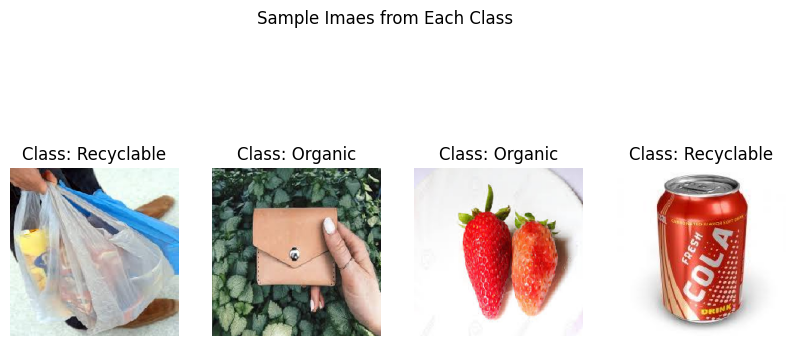

In [9]:
plt.figure(figsize=(10,5))
for i in range(4):
    image, label = next(train_data)
    plt.subplot(1,4, i + 1)
    plt.imshow(image[0])
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Imaes from Each Class")
plt.show()

# Load and Configure MobileNet Model

In [12]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
mobilenet_model.trainable =False
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])    

### Train the Model

In [14]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)
model.save('mobilenet_waste_classifier.h5')
loss, accuracy=model.evaluate(test_data)
print("Model Accuracy:",accuracy)

Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 836s 1s/step - accuracy: 0.9181 - loss: 0.2137 - val_accuracy: 0.8695 - val_loss: 0.2947
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 758s 1s/step - accuracy: 0.9385 - loss: 0.1663 - val_accuracy: 0.9029 - val_loss: 0.2326


79/79 ━━━━━━━━━━━━━━━━━━━━ 72s 917ms/step - accuracy: 0.9130 - loss: 0.2206 
Model Accuracy: 0.9029048681259155


 The model learns over 5 epochs, seeing images in the training data, adjusting itself  and testing on new images

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

#Generate predictions
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_data.classes

#Print classification report
print("Classification report:\n",classification_report(y_true,y_pred,target_names=['Organic','Recyclable']))

#Print confusion matrix
conf_matrix = confusion_matrix(y_true,y_pred)
print("Confusion Matrix:\n",conf_matrix)

#Here, we measure the perfornmance of the model.

79/79 ━━━━━━━━━━━━━━━━━━━━ 78s 966ms/step 
Classification report:
               precision    recall  f1-score   support

     Organic       0.55      0.60      0.58      1401
  Recyclable       0.43      0.38      0.41      1112

    accuracy                           0.50      2513
   macro avg       0.49      0.49      0.49      2513
weighted avg       0.50      0.50      0.50      2513

Confusion Matrix:
 [[845 556]
 [688 424]]


### Test the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


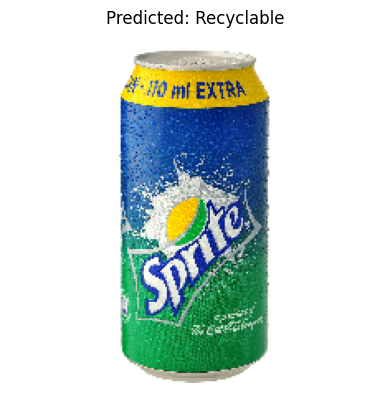

In [26]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from warnings import filterwarnings
filterwarnings('ignore')
#Path to the trained model and test image
model_path = 'mobilenet_waste_classifier.h5'
test_image_path = r"C:\Users\HP\Desktop\GreenAIWorkshop\waste classification dataset\DATASET\TEST\R\R_11111.jpg"

#Load the trained model
model = tf.keras.models.load_model(model_path)

#Load and prepare the test image
test_img = load_img(test_image_path,target_size=(224,224))# Load Image and resize
test_img_array= img_to_array(test_img)/255.0 # Normalize pixel values
test_img_array = np.expand_dims(test_img_array,axis=0)# ADD batch dimension

#Predict the class of the test image
predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else "Recyclable"

#Display the test image and prediction
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()